### Análise geográfica

Importar a taxa de abstenção dos estados

In [1]:
import pandas as pd
abstencao_estados = pd.read_csv('abstencao_estados.csv')
abstencao_estados.set_index('estado',inplace = True)
abstencao_estados

,abstencao
estado,
RN,28.311434
DF,28.648135
PB,30.596853
PI,30.711137
BA,30.966553
AC,32.120301
ES,32.796958
PA,34.096585
SE,34.589669


#### Análise das desistências por estado em ordem decrescente 

<AxesSubplot:title={'center':'Desistências por estado'}, ylabel='estado'>

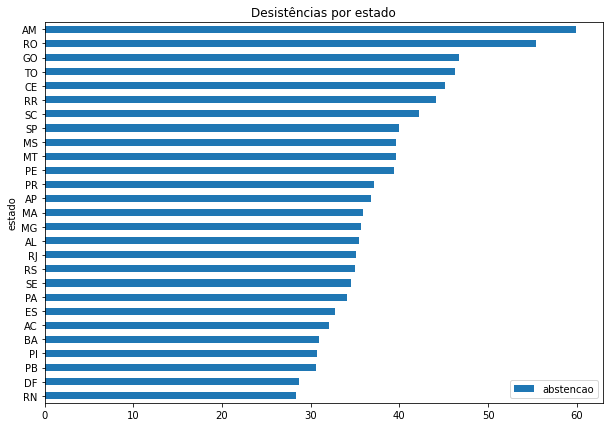

In [2]:
abstencao_estados.sort_values(by='abstencao').plot.barh(title='Desistências por estado', yticks=[30, 40, 80],figsize=(10, 7))

Importar as regiões brasileiras por estado

In [3]:
regioes = pd.read_csv('regioes.csv')
regioes

,estado,região
0,AC,Norte
1,AM,Norte
2,AP,Norte
3,PA,Norte
4,RO,Norte
5,RR,Norte
6,TO,Norte
7,AL,Nordeste
8,BA,Nordeste
9,CE,Nordeste


In [4]:
abstencao_estados = abstencao_estados.reset_index()

#### Preparação da análise por região
Juntar as tabelas de abstenção e regiões

In [5]:
df = pd.merge(abstencao_estados, regioes, how = 'inner', on = 'estado')
df

,estado,abstencao,região
0,RN,28.311434,Nordeste
1,DF,28.648135,Centro-Oeste
2,PB,30.596853,Nordeste
3,PI,30.711137,Nordeste
4,BA,30.966553,Nordeste
5,AC,32.120301,Norte
6,ES,32.796958,Sudeste
7,PA,34.096585,Norte
8,SE,34.589669,Nordeste
9,RS,34.950420,Sul


#### Análise das desistências por região

In [6]:
df_regiao = df.groupby(['região']).sum()/df.groupby(['região']).count()
df_regiao = df_regiao.drop(columns=['estado'])
df_regiao

,abstencao
região,
Centro-Oeste,38.633560
Nordeste,34.565284
Norte,44.098363
Sudeste,35.864349
Sul,38.105614


<AxesSubplot:title={'center':'Desistências por região'}, ylabel='região'>

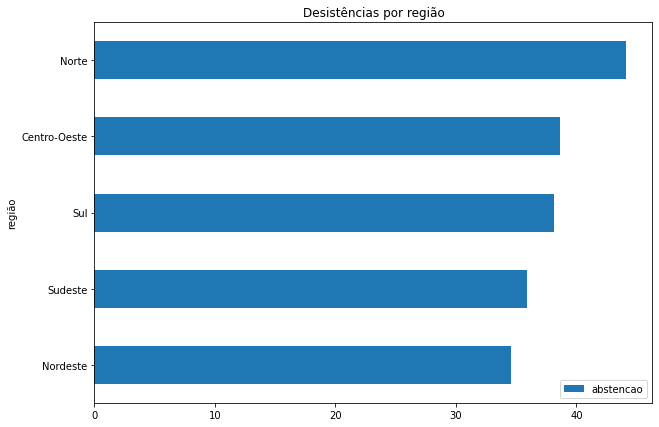

In [7]:
df_regiao.sort_values(by='abstencao').plot.barh(title='Desistências por região', yticks=[30, 40, 80],figsize=(10, 7))

#### Análise das desistências por gráfico de mapa
Foi utilizado o geobr para esta análise

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd 
import geobr

In [9]:
states = geobr.read_state(year=2019)
states = states.merge(abstencao_estados,how='left',left_on="abbrev_state",right_on="estado")
states

C:\Users\bruna\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_state,abbrev_state,name_state,code_region,name_region,geometry,estado,abstencao
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916...",RO,55.357488
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ...",AC,32.120301
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ...",AM,59.912994
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",RR,44.094067
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ...",PA,34.096585
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2...",AP,36.839827
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23163 -5.94614, -48.22940 ...",TO,46.267281
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53542 ...",MA,35.955056
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91539 -6.64607, -42.91722 ...",PI,30.711137
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ...",CE,45.196497


Plotando o gráfico de mapa com a taxa de abstenção por estado

C:\Users\bruna\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\bruna\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\bruna\anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

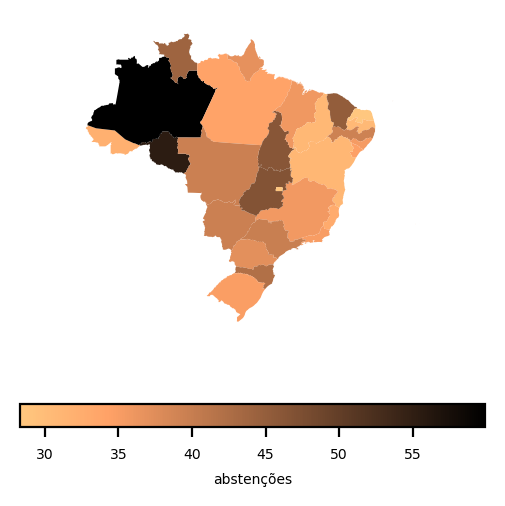

In [10]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
states.plot(
    column="abstencao",
    cmap="copper_r",
    legend=True,
    legend_kwds={
        "label": "abstenções",
        "orientation": "horizontal",
        "shrink": 1,
    },
    ax=ax,
)
ax.axis("off")